In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Diabetes

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir si un paciente tiene o no diabetes, basándose en ciertas medidas diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones en la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres mayores de 21 años de herencia india Pima.

## Cargar los datos

Abrir el archivo "diabetes.csv" en la carpeta "data". Analizar su estructura y responder las siguientes preguntas:

*   ¿Cuántas instancias o ejemplos tiene el dataset?
*   ¿Cómo se llama la variable de salida o target? ¿Qué tipo de datos es?
*   ¿Cuántos atributos posee cada instancia o ejemplo?¿Puede detectar datos faltantes en algún atributo?
*   ¿Qué tipo de dato tiene cada atributo?
*   ¿Presenta algún atributo categórico? Si es así, cuántas categorías posee y cuántas instancias tiene en cada categoría.

### ⚠️
Antes de realizar cualquier procesamiento, no olvide de separar los datos en entrenamiento y prueba.

In [6]:
diabetes = pd.read_csv('data/diabetes.csv')

print(f'Shape: {diabetes.shape}')

# Target = Outcome
diabetes.head()
# Observamos cada tipo de las columnas, la mayoria son int64, junto con float64
diabetes.info()
# El tipo de variable de Outcome es int64
# Se puede observar que para cada ejemplo tenemos 8 características y un target (Outcome)

# Analisis de datos faltantes
print(diabetes.isnull().sum())
# Vemos que hay 12 datos faltantes de SkinThickness, 5 de Insulin, 1 de BMI y 1 de BloodPressure.
print(diabetes.head(10))

Shape: (768, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             767 non-null    float64
 4   SkinThickness             756 non-null    float64
 5   Insulin                   763 non-null    float64
 6   BMI                       767 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 60.1 KB
Unnamed: 0                   0
Pregnancies                  0
Glucose                      0
BloodPressure                1
SkinThickness               12
Insulin     

In [7]:
# Eliminamos la columna 'Unnamed: 0' que no aporta información
data = diabetes.drop(['Unnamed: 0'], axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


Analice con cuidado el rango de valores de los atributos. ¿Nota valores atípicos a simple vista en algún/algunos de los atributos?

In [8]:
# Hacemos un describe para analizar los rangos de los datos
data.describe()

# Podemos observar que Glucosa presenta un valor de 199 como máximo, lo cual es un valor muy alto para una persona normal
# También vemos que Insulin tiene un valor máximo de 846, pero no sabemos cómo está calculada por lo que no podemos decir si es un valor anormal o no
# Glucose, BloodPressure, SkinThickness, Insulin y BMI tienen valores mínimos de 0, lo cual es imposible para una persona normal

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,767.000000,756.000000,763.000000,767.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.195567,20.862434,80.322412,32.034289,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.206609,15.865314,115.439459,7.804050,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,128.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Separamos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, test_size=0.2, stratify=data['Outcome'], random_state=42)
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
353,1,90,62.0,12.0,43.0,27.2,0.580,24,0
711,5,126,78.0,27.0,22.0,29.6,0.439,40,0
373,2,105,58.0,40.0,94.0,34.9,0.225,25,0
46,1,146,56.0,0.0,0.0,29.7,0.564,29,0
682,0,95,64.0,39.0,105.0,44.6,0.366,22,0


In [10]:
df_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
44,7,159,64.0,0.0,0.0,27.4,0.294,40,0
672,10,68,106.0,23.0,49.0,35.5,0.285,47,0
700,2,122,76.0,27.0,200.0,35.9,0.483,26,0
630,7,114,64.0,0.0,0.0,27.4,0.732,34,1
81,2,74,0.0,0.0,0.0,0.0,0.102,22,0


In [11]:
# Análisis de valores atípicos para los datos de entrenamiento
df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,613.000000,603.000000,609.000000,613.000000,614.000000,614.000000,614.000000
mean,3.819218,120.908795,69.556281,21.155887,79.311987,32.025449,0.477428,33.366450,0.348534
std,3.314148,31.561093,18.202084,15.747665,107.941251,7.760728,0.330300,11.833438,0.476895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,43.000000,32.300000,0.382500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,130.000000,36.500000,0.639250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.329000,81.000000,1.000000


In [12]:
# Análisis de valores atípicos para los datos de testeo
df_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,154.000000,154.000000,154.000000,153.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.948052,120.837662,67.759740,19.705882,84.318182,32.069481,0.449740,32.740260,0.350649
std,3.591552,33.670155,22.782018,16.321959,141.595424,7.999807,0.335567,11.487877,0.478730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,62.500000,0.000000,0.000000,26.425000,0.237000,23.000000,0.000000
50%,3.000000,117.000000,72.000000,22.000000,0.000000,31.600000,0.333000,28.000000,0.000000
75%,6.000000,141.500000,80.000000,32.000000,115.000000,36.600000,0.583000,39.750000,1.000000
max,15.000000,197.000000,106.000000,63.000000,846.000000,59.400000,2.420000,68.000000,1.000000


Estos valores atípicos encontrados a simple vista es mejor tratarlos como datos faltantes. Utilice el método **[replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)** de pandas para reemplazarlos por `np.NaN`



In [13]:
# Reemplazamos los valores 0 de la columna Glucose, BloodPressure, SkinThickness, Insulin y BMI por np.NaN de los conjuntos de entrenamiento y prueba

df_train['Glucose'] = df_train['Glucose'].replace(0, np.NaN)
df_train['BloodPressure'] = df_train['BloodPressure'].replace(0, np.NaN)
df_train['SkinThickness'] = df_train['SkinThickness'].replace(0, np.NaN)
df_train['Insulin'] = df_train['Insulin'].replace(0, np.NaN)
df_train['BMI'] = df_train['BMI'].replace(0, np.NaN)

df_test['Glucose'] = df_test['Glucose'].replace(0, np.NaN)
df_test['BloodPressure'] = df_test['BloodPressure'].replace(0, np.NaN)
df_test['SkinThickness'] = df_test['SkinThickness'].replace(0, np.NaN)
df_test['Insulin'] = df_test['Insulin'].replace(0, np.NaN)
df_test['BMI'] = df_test['BMI'].replace(0, np.NaN)



Después de realizar el reemplazo, ¿Cuántos datos faltantes presenta cada atributo?

In [14]:
df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,610.000000,591.000000,439.000000,324.000000,605.000000,614.000000,614.000000,614.000000
mean,3.819218,121.701639,72.145516,29.059226,149.077160,32.448926,0.477428,33.366450,0.348534
std,3.314148,30.099771,12.512061,10.519221,107.234748,6.874773,0.330300,11.833438,0.476895
min,0.000000,56.000000,24.000000,7.000000,15.000000,18.200000,0.084000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,21.000000,76.000000,27.600000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.382500,29.000000,0.000000
75%,6.000000,140.750000,80.000000,36.000000,183.500000,36.600000,0.639250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.329000,81.000000,1.000000


Datos faltantes en el conjunto de entrenamiento:

Total de filas: 614

- Glucose: 4

- BloodPressure: 23

- SkinThickness: 175

- Insulin: 290

- BMI: 9

In [15]:
df_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,154.000000,153.000000,142.000000,102.000000,70.000000,152.000000,154.000000,154.000000,154.000000
mean,3.948052,121.627451,73.485915,29.558824,185.500000,32.491447,0.449740,32.740260,0.350649
std,3.591552,32.317887,11.807400,10.334575,159.423395,7.144469,0.335567,11.487877,0.478730
min,0.000000,44.000000,48.000000,10.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,65.250000,22.250000,83.500000,26.500000,0.237000,23.000000,0.000000
50%,3.000000,118.000000,72.000000,29.000000,123.500000,31.800000,0.333000,28.000000,0.000000
75%,6.000000,142.000000,81.500000,36.750000,262.500000,36.675000,0.583000,39.750000,1.000000
max,15.000000,197.000000,106.000000,63.000000,846.000000,59.400000,2.420000,68.000000,1.000000


Datos faltantes en el conjunto de testeo:

Total de filas: 154

- Glucose: 1

- BloodPressure: 12

- SkinThickness: 102

- Insulin: 84

- BMI: 2

## Datos Faltantes

Grafique el histograma de cada atributo con datos faltantes y decida que valor utilizar (media o mediana) para imputar, en función de la distribución que tienen los datos. Utilice la función **fillna** de pandas ([Documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)).
Puede utilizar el parámetro alpha para darle transparencia a los histogramas y agregar una leyenda para identificar la clase.

### ⚠️
**Aclaración:** Algo a tener en cuenta en este ejemplo es que los atributos pueden tener distribuciones diferentes según la salida o target (con diabetes/ sin diabetes). Una persona sana tendrá un valor de insulina en un rango distinto a una persona no sana. Por tanto es recomendable graficar el histograma por atributo y por clase, de igual manera, calcular la media o mediana según la clase e imputar un valor teniendo en cuenta el mismo criterio.

Si lo deseea puede implementar su propio transformer para imputar datos de forma condicional, dependiendo de la clase y un pipeline para la preparación completa de los datos.

Pregnancies -> 0: 1.09176146220901 ---> 8.887994987468673
Pregnancies -> 1: 0.49305227335332136 ---> 13.590825325786495
Glucose -> 0: 0.5957715113515726 ---> 552.6092490158602
Glucose -> 1: 0.03794033270529858 ---> 882.5179960654565
BloodPressure -> 0: 0.156907083375636 ---> 152.23764618130477
BloodPressure -> 1: 0.042563137308315166 ---> 149.48641662195777
SkinThickness -> 0: 0.33016061907267663 ---> 96.87897189662476
SkinThickness -> 1: 1.436637458886848 ---> 112.86217500698909
Insulin -> 0: 2.6740054217208713 ---> 8362.454901108455
Insulin -> 1: 1.497822402346414 ---> 13579.191471287804
BMI -> 0: 0.393956515074672 ---> 40.84419691540739
BMI -> 1: 0.9479385272734522 ---> 44.60842618259858
DiabetesPedigreeFunction -> 0: 1.9895514777905734 ---> 0.09319492681077693
DiabetesPedigreeFunction -> 1: 1.5559021528163066 ---> 0.13082083532973543
Age -> 0: 1.5776292150450926 ---> 134.77070175438598
Age -> 1: 0.5558871037974134 ---> 127.19654688254134


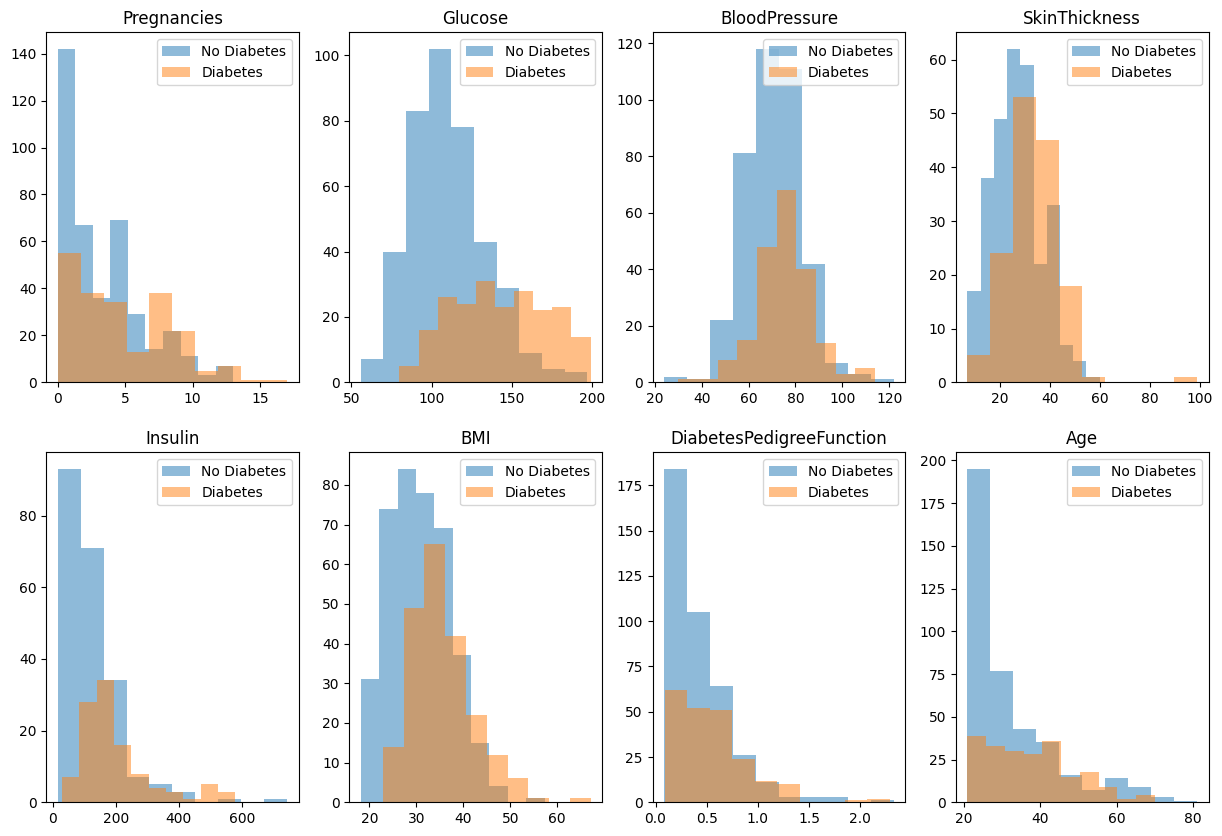

In [16]:
# Graficamos los datos de entrenamiento con histogramas para cada uno de las columnas según la clase dada en Outcome
from scipy.stats import skew
train_groupby = df_train.groupby('Outcome')

fig, axes = plt.subplots(2, len(df_train.columns) // 2, figsize=(15, 10))

for column, ax in zip(df_train.columns, axes.flatten()):
    for key in train_groupby.groups.keys():
        ax.hist(train_groupby.get_group(key)[column], bins=10, alpha=0.5, label= 'No Diabetes' if key==0 else 'Diabetes')
        print(f"{column} -> {key}: {skew(train_groupby.get_group(key)[column], nan_policy='omit')} ---> {train_groupby.get_group(key)[column].dropna().var()}")
    ax.set_title(column)
    ax.legend()
plt.show()

Pregnancies -> 0: 1.1784856897411644 ---> 10.057676767676766
Pregnancies -> 1: 0.4950966602331762 ---> 15.676100628930817
Glucose -> 0: 0.7086125955199398 ---> 867.2615955473099
Glucose -> 1: 0.29936511301903695 ---> 860.2641509433962
BloodPressure -> 0: 0.2835364493384926 ---> 127.22463768115945
BloodPressure -> 1: 0.21054675963836295 ---> 161.91496598639455
SkinThickness -> 0: 0.3980170440038567 ---> 116.08312020460359
SkinThickness -> 1: 1.077951060388597 ---> 80.64772727272727
Insulin -> 0: 1.7725114284037715 ---> 18724.016156462585
Insulin -> 1: 1.7395744791506453 ---> 39423.35714285715
BMI -> 0: 0.6434189545580511 ---> 52.24561855670104
BMI -> 1: 1.3027268182782912 ---> 40.8351642208246
DiabetesPedigreeFunction -> 0: 1.9846833903401708 ---> 0.07404505414141417
DiabetesPedigreeFunction -> 1: 2.112314650612611 ---> 0.1726734241788959
Age -> 0: 1.5336029547288894 ---> 142.8221212121212
Age -> 1: 0.6209944252327597 ---> 94.14430468204054


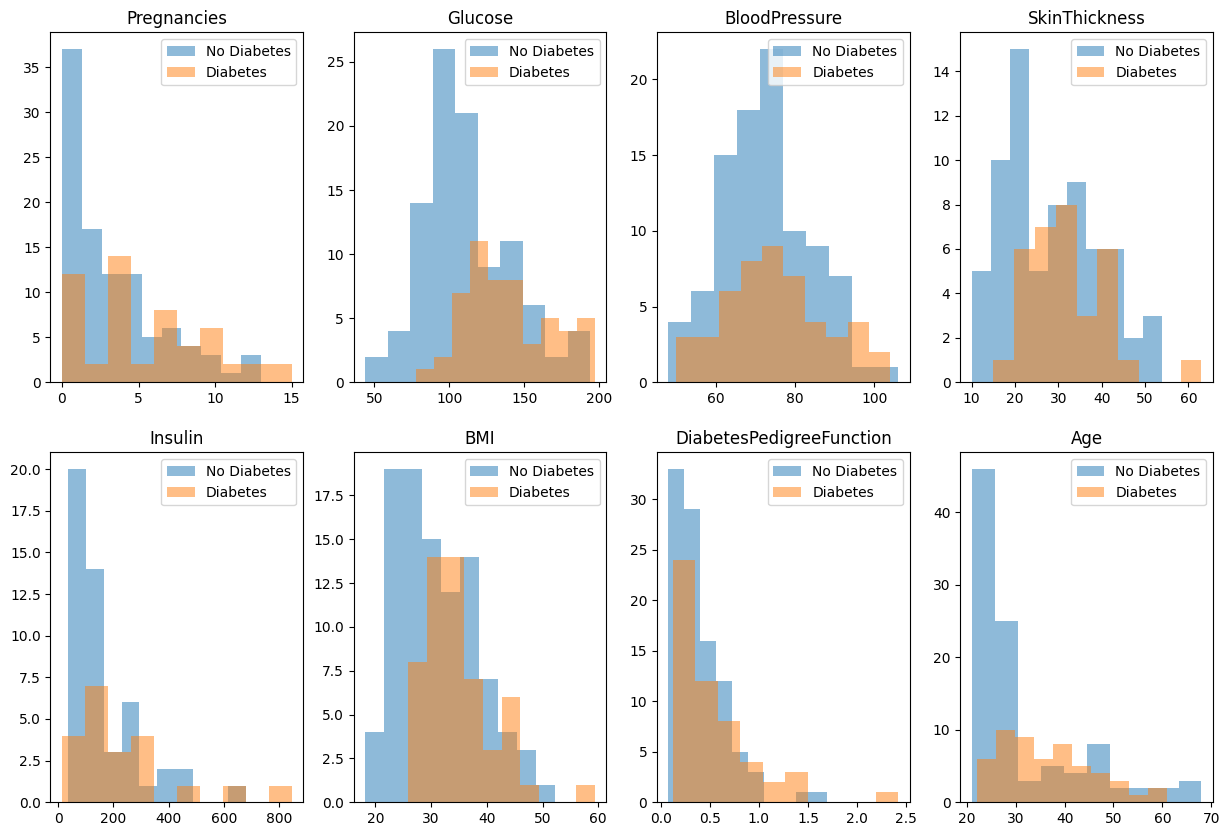

In [17]:
test_groupby = df_test.groupby('Outcome')

fig, axes = plt.subplots(2, len(df_train.columns) // 2, figsize=(15, 10))

for column, ax in zip(df_train.columns, axes.flatten()):
    for key in test_groupby.groups.keys():
        ax.hist(test_groupby.get_group(key)[column], bins=10, alpha=0.5, label= 'No Diabetes' if key==0 else 'Diabetes')
        # Vemos la simetria para cada uno de los gráficos... Habría que usar curtosis tmb pero bueno
        print(f"{column} -> {key}: {skew(test_groupby.get_group(key)[column], nan_policy='omit')} ---> {test_groupby.get_group(key)[column].dropna().var()}")
    ax.set_title(column)
    ax.legend()
plt.show()

In [18]:
# Transformer para imputar datos faltantes según el target de cada fila (Outcome)
from sklearn.base import TransformerMixin
from scipy.stats import skew

# Transformer para imputar datos faltantes de un dataframe según el target de cada fila (Outcome)
class ImputerByTarget(TransformerMixin):
    def __init__(self, target):
        self.target = target

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for column in X_copy.columns:
            groupby = X_copy.groupby(self.target)[column]
            for key in groupby.groups.keys():
                group_data = groupby.get_group(key)
                # Si la asimetría es menor a 0.5, se imputa con la media, sino con la mediana
                method = 'mean' if skew(group_data, nan_policy='omit') < 0.5 else 'median'
                X_copy.loc[group_data.index, column] = group_data.fillna(group_data.mean() if method == 'mean' else group_data.median())
        return X_copy

In [19]:
# Vemos los datos antes de transformarlos y después de la transformación
print(df_train.describe())
df_train_trans = ImputerByTarget('Outcome').transform(df_train)
df_train_trans.describe()

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin   
count   614.000000  610.000000     591.000000     439.000000  324.000000  \
mean      3.819218  121.701639      72.145516      29.059226  149.077160   
std       3.314148   30.099771      12.512061      10.519221  107.234748   
min       0.000000   56.000000      24.000000       7.000000   15.000000   
25%       1.000000   99.000000      64.000000      21.000000   76.000000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.750000      80.000000      36.000000  183.500000   
max      17.000000  199.000000     122.000000      99.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  605.000000                614.000000  614.000000  614.000000  
mean    32.448926                  0.477428   33.366450    0.348534  
std      6.874773                  0.330300   11.833438    0.476895  
min     18.200000                  

C:\Users\darkstar\AppData\Local\Temp\ipykernel_20812\4189028253.py:20: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  method = 'mean' if skew(group_data, nan_policy='omit') < 0.5 else 'median'


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.819218,121.726092,72.170460,29.122217,137.526059,32.436093,0.477428,33.366450,0.348534
std,3.314148,30.036042,12.285046,9.029112,81.937479,6.827300,0.330300,11.833438,0.476895
min,0.000000,56.000000,24.000000,7.000000,15.000000,18.200000,0.084000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,100.000000,27.625000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,100.000000,32.400000,0.382500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,168.000000,36.500000,0.639250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.329000,81.000000,1.000000


In [20]:
# Vemos los datos antes de transformarlos y después de la transformación
print(df_test.describe())
df_test_trans = ImputerByTarget('Outcome').transform(df_test)
df_test_trans.describe()

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin   
count   154.000000  153.000000     142.000000     102.000000   70.000000  \
mean      3.948052  121.627451      73.485915      29.558824  185.500000   
std       3.591552   32.317887      11.807400      10.334575  159.423395   
min       0.000000   44.000000      48.000000      10.000000   14.000000   
25%       1.000000  100.000000      65.250000      22.250000   83.500000   
50%       3.000000  118.000000      72.000000      29.000000  123.500000   
75%       6.000000  142.000000      81.500000      36.750000  262.500000   
max      15.000000  197.000000     106.000000      63.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  152.000000                154.000000  154.000000  154.000000  
mean    32.491447                  0.449740   32.740260    0.350649  
std      7.144469                  0.335567   11.487877    0.478730  
min     18.200000                  

C:\Users\darkstar\AppData\Local\Temp\ipykernel_20812\4189028253.py:20: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  method = 'mean' if skew(group_data, nan_policy='omit') < 0.5 else 'median'


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.948052,121.525974,73.499161,29.647939,160.116883,32.458442,0.449740,32.740260,0.350649
std,3.591552,32.236706,11.339742,8.462347,111.757496,7.103488,0.335567,11.487877,0.478730
min,0.000000,44.000000,48.000000,10.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,66.000000,25.000000,115.000000,26.600000,0.237000,23.000000,0.000000
50%,3.000000,117.000000,72.666667,28.347826,115.000000,31.600000,0.333000,28.000000,0.000000
75%,6.000000,141.500000,80.000000,32.000000,176.000000,36.600000,0.583000,39.750000,1.000000
max,15.000000,197.000000,106.000000,63.000000,846.000000,59.400000,2.420000,68.000000,1.000000


Después de la preparación de datos, entrene 3 clasificadores (KNN, LDA, SVM con kernel gaussiano) y compare sus desempeños (usando la métrica de Accuracy).

In [21]:
# Separamos X e Y de los conjuntos de entrenamiento y prueba
df_train_x = df_train_trans.drop(['Outcome'], axis=1)
df_train_y = df_train_trans['Outcome']

df_test_x = df_test_trans.drop(['Outcome'], axis=1)
df_test_y = df_test_trans['Outcome']


Escalamos nuestros datos con el StandardScaler de sklearn

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_train_x_sc = sc.fit_transform(df_train_x)
df_test_x_sc = sc.transform(df_test_x)

** Modelo LDA **

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)
lda.fit(df_train_x_sc, df_train_y)

y_pred_lda = lda.predict(df_test_x_sc)
np.sum(df_test_y != y_pred_lda)

44

** Modelo KNN **

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2, p = 2)
knn.fit(df_train_x_sc, df_train_y)

y_pred_knn = knn.predict(df_test_x_sc)
np.sum(df_test_y != y_pred_knn)

35

** Modelo SVM **

In [25]:
from sklearn.svm import SVC

rbf = SVC(kernel='rbf', gamma='auto')
rbf.fit(df_train_x_sc, df_train_y)

y_pred_svm = rbf.predict(df_test_x_sc)
np.sum(df_test_y != y_pred_svm)


29

In [26]:
from sklearn.metrics import accuracy_score

accuracy_lda = accuracy_score(df_test_y, y_pred_lda)
accuracy_knn = accuracy_score(df_test_y, y_pred_knn)
accuracy_svm = accuracy_score(df_test_y, y_pred_svm)
print(f'Accuracy LDA: {accuracy_lda}')
print(f'Accuracy KNN: {accuracy_knn}')
print(f'Accuracy SVM: {accuracy_svm}')

Accuracy LDA: 0.7142857142857143
Accuracy KNN: 0.7727272727272727
Accuracy SVM: 0.8116883116883117
